In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class Perceptron:

    def __init__(self, n_input, learning_rate = 0.1):
        ## El vector w se inicializa con valores aleatorios (-1, 1)
        self.w = -1 + 2 * np.random.rand(n_input)
        self.b = -1 + 2 * np.random.rand()
        self.eta = learning_rate

    def predict(self, X):
        y_est = (self.w.T @ X) + self.b
        if (y_est >= 0):
             y_est = 1
        else:
            y_est = 0

        return y_est
    
    def fit(self, X, Y, epochs = 50):
        # Obtener el numero de patrones p
        p = X.shape[1]
        y_est = np.zeros(p)
        for _ in range(epochs):
            for i in range(p):
                y_est[i] = self.predict(X[:, i])

                self.w += self.eta * (Y[i] - y_est[i]) * X[:, i]
                self.b += self.eta * (Y[i] - y_est[i])

In [30]:
X_and = np.array([[0, 0, 1, 1],
                  [0, 1, 0, 1]])

Y_and = np.array([0, 0, 0, 1])


X_or =  np.array([[0, 0, 1, 1],
                  [0, 1, 0, 1]])

Y_or =  np.array([0, 1, 1, 1])


X_xor =  np.array([[0, 0, 1, 1],
                   [0, 1, 0, 1]])

Y_xor =  np.array([0, 1, 1, 0])

In [31]:
def draw_2d_points(X, Y):
    p = X.shape[1]

    plt.title('Perceptron')
    plt.grid('on')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    for i in range(p):
        if(Y[i] == 0):
            plt.plot(X[0,i], X[1,i], 'or')
        else:
            plt.plot(X[0,i], X[1,i], 'ob')

def draw_2d(model):
    # Extrae los parametros del modelo
    w1, w2, b = model.w[0], model.w[1], model.b
    # Limite inferior y superior
    li, ls = -2, 2

    plt.plot([li,ls],
             [(1/w2)*(-w1*(li)-b),(1/w2)*(-w1*ls-b)],
             '--k')

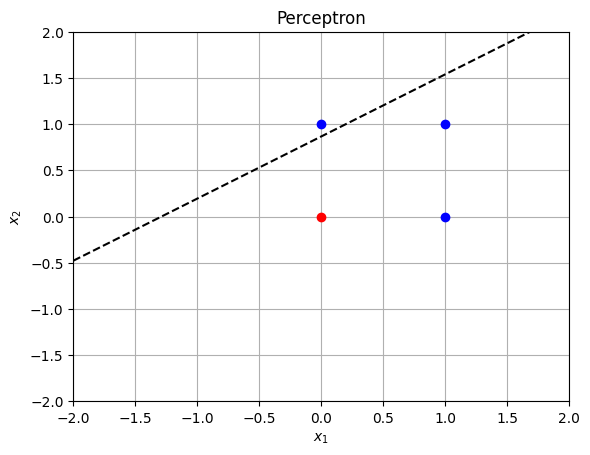

In [32]:
# Crea un objeto de clase perceptro con entrada de 2 dimensiones
neuron = Perceptron(2)

draw_2d(neuron)
draw_2d_points(X_or, Y_or)

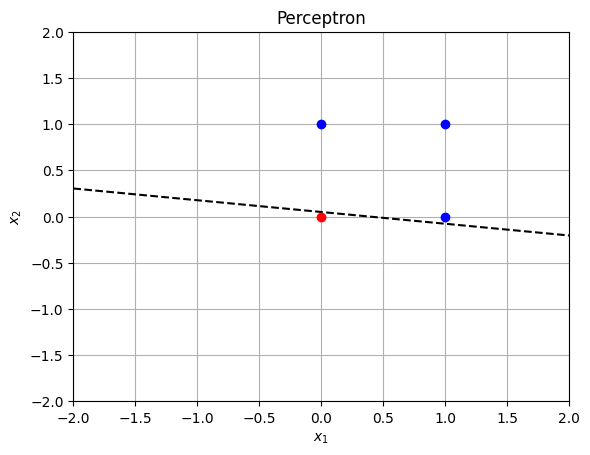

In [33]:
# Entrena neurona en base a los datos de la compuerta elegida
neuron.fit(X_or, Y_or)

draw_2d(neuron)
draw_2d_points(X_or, Y_or)